## Premier League 21/22 Shooting Data Analysis with Python

### Introduction

###### The purpose of this notebook is to upload, clean, and analyse the shooting data (provided by fbref) for the 21/22 Premier League season. The various data will be explored, filtered, and manipulated to gain any insights provided, with visualisations created to display the relationships in the data to the reader.

### Loading and cleaning the data

###### The first step is to import the libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

###### Then, the dataset must be loaded and the first few rows can be observed to confirm this is done correctly

In [2]:
epl_df = pd.read_excel('epl_data.xlsx')
epl_df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,0,13,2,...,0.00,20.5,0,0,0,0.7,0.7,0.05,-0.7,-0.7
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,7,49,24,...,0.29,12.9,0,0,0,7.1,7.1,0.14,-0.1,-0.1
2,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,20.3,1,13,4,...,0.25,16.9,0,0,0,0.7,0.7,0.06,0.3,0.3
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,1,7,1,...,1.00,9.1,0,0,0,0.8,0.8,0.11,0.2,0.2
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,2,5,2,...,1.00,5.8,0,0,0,1.1,1.1,0.23,0.9,0.9


###### Some checks for cleaning are undertaken to ensure all the columns are in the correct format, the appropriate number of rows have loaded in (546), and all the values are in line with expectations (e.g. the top scorer for the season finished with 23 goals, which is the maximum value for goals).

In [3]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   546 non-null    object 
 1   Nation   546 non-null    object 
 2   Pos      546 non-null    object 
 3   Squad    546 non-null    object 
 4   Age      546 non-null    int64  
 5   Born     546 non-null    int64  
 6   90s      546 non-null    float64
 7   Gls      546 non-null    int64  
 8   Sh       546 non-null    int64  
 9   SoT      546 non-null    int64  
 10  SoT%     452 non-null    float64
 11  Sh/90    546 non-null    float64
 12  SoT/90   546 non-null    float64
 13  G/Sh     452 non-null    float64
 14  G/SoT    389 non-null    float64
 15  Dist     452 non-null    float64
 16  FK       546 non-null    int64  
 17  PK       546 non-null    int64  
 18  PKatt    546 non-null    int64  
 19  xG       546 non-null    float64
 20  npxG     546 non-null    float64
 21  npxG/Sh  452 non

In [4]:
epl_df.describe()

,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,452.000000,546.000000,546.000000,452.000000,389.000000,452.000000,546.000000,546.000000,546.000000,546.000000,546.000000,452.000000,546.000000,546.000000
mean,25.452381,1995.139194,15.283883,1.899267,17.730769,5.785714,29.569690,1.230110,0.365073,0.083363,0.285476,16.736062,0.604396,0.153846,0.188645,1.928755,1.784982,0.090465,-0.029487,-0.039560
std,4.375759,4.374535,11.251539,3.257021,21.373456,7.901449,19.576938,1.476257,0.592899,0.110743,0.272911,5.110752,1.907277,0.676034,0.787016,2.982733,2.673862,0.051492,1.160192,1.165786
min,16.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,-5.700000,-6.000000
25%,22.000000,1992.000000,4.425000,0.000000,2.000000,0.000000,20.000000,0.320000,0.000000,0.000000,0.000000,13.275000,0.000000,0.000000,0.000000,0.100000,0.100000,0.050000,-0.500000,-0.500000
50%,25.000000,1995.000000,14.750000,1.000000,10.000000,2.000000,29.700000,0.815000,0.200000,0.060000,0.250000,16.900000,0.000000,0.000000,0.000000,0.800000,0.750000,0.080000,0.000000,0.000000
75%,29.000000,1998.000000,23.950000,2.000000,26.000000,8.000000,39.225000,1.877500,0.557500,0.130000,0.420000,20.200000,0.000000,0.000000,0.000000,2.500000,2.400000,0.120000,0.200000,0.200000
max,39.000000,2004.000000,38.000000,23.000000,134.000000,51.000000,100.000000,20.000000,10.000000,1.000000,1.000000,33.800000,23.000000,6.000000,7.000000,21.800000,17.100000,0.450000,8.600000,8.600000


###### Filters are applied to only analyse players that took 15 or more shots and greater than 0.7 shots per game as a lower volume of shots would skew the data because A) they are more likely to be taken by players who rarely shoot due to being poorer quality shot-takers and B) because a low volume of data increases the uncertainty of any insights.
###### Other options for restrictive parameters are to limit the average distance of shots to 18 yards (the distance between the edge of the penalty area and the goal line), but this was not selected as it would bias towards only selecting FW (striker) data and analysis penalty box finishing is not the aim of this particular report.
###### Additionally, a filter for the minimum npxG per shot was considered to introduce a lower limit for the quality of shots, yet due to the variability of xG models this was also not applied.

In [ ]:
# cln_df = epl_df[(epl_df['90s'] > 12.66) & (epl_df['Sh'] >= 15)]

In [26]:
cln_df = epl_df[(epl_df['Sh'] >= 15) & (epl_df['Sh/90'] > 0.7)]

###### The cleaned dataset is observed to see how many players remain and if any issues arise. Expectedly, the mean values for the number of 90s, goals, shots, etc increased.

In [27]:
cln_df.describe()

,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.554455,1995.024752,21.583168,4.366337,39.054455,13.163366,32.811386,1.883020,0.637376,0.093267,0.282970,17.085149,1.396040,0.356436,0.440594,4.424257,4.088614,0.100693,-0.057921,-0.078713
std,3.705516,3.653443,8.011429,4.211387,21.480571,8.712549,9.487919,0.763676,0.343025,0.058235,0.165635,3.850809,2.839239,0.967987,1.123665,3.667954,3.221109,0.039518,1.777572,1.789436
min,19.000000,1985.000000,5.200000,0.000000,15.000000,2.000000,7.700000,0.740000,0.110000,0.000000,0.000000,7.700000,0.000000,0.000000,0.000000,0.600000,0.600000,0.030000,-5.700000,-6.000000
25%,23.000000,1992.000000,15.400000,1.000000,23.000000,7.000000,26.150000,1.242500,0.352500,0.050000,0.170000,14.300000,0.000000,0.000000,0.000000,1.900000,1.900000,0.070000,-1.100000,-1.100000
50%,25.000000,1996.000000,21.100000,3.000000,33.000000,11.000000,33.300000,1.850000,0.590000,0.090000,0.290000,16.950000,0.000000,0.000000,0.000000,3.100000,3.100000,0.090000,-0.300000,-0.300000
75%,29.000000,1998.000000,28.350000,6.000000,48.000000,17.000000,39.275000,2.410000,0.870000,0.130000,0.377500,19.700000,1.000000,0.000000,0.000000,5.775000,5.100000,0.130000,0.700000,0.775000
max,36.000000,2002.000000,37.500000,23.000000,134.000000,51.000000,57.700000,4.370000,1.600000,0.280000,1.000000,27.100000,23.000000,5.000000,7.000000,21.800000,17.100000,0.220000,8.600000,8.600000


###### The cleaned dataset is checked to see if there are any null values.

In [28]:
cln_df.isnull().sum()

Player     0
Nation     0
Pos        0
Squad      0
Age        0
Born       0
90s        0
Gls        0
Sh         0
SoT        0
SoT%       0
Sh/90      0
SoT/90     0
G/Sh       0
G/SoT      0
Dist       0
FK         0
PK         0
PKatt      0
xG         0
npxG       0
npxG/Sh    0
G-xG       0
np:G-xG    0
dtype: int64

###### A simple check is carried out to confirm if the calculated columns, such as the difference between goals and xG, are correct, by equating them to the manipulated columns (e.g. 'G-xG' = 'Gls' - 'xG').

In [31]:
(round((cln_df['Gls'] - cln_df['xG']), 1) == cln_df['G-xG']).sum()

202

### Exploratory analysis

###### First, some simple stats are calculated. The greatest xG over and underperformers are highlighted, along with a few important variables for each corresponding player. Interestingly, they took the same number of shots across the season.

In [38]:
cln_df.loc[cln_df['G-xG'].idxmax(), ['Player', 'Pos', 'Gls', 'xG', 'Sh']]

Player    Kevin De Bruyne
Pos                    MF
Gls                    15
xG                    6.4
Sh                     77
Name: 112, dtype: object

In [ ]:
# finding the greatest xG underperformer
# selecting g-xg from df, finding its minimum value, and then returning the df based on the location of that value and the
# Player col ##### cln_df.loc[cln_df['G-xG'].idxmin(), ['Player']] #####
# or returning all cols #### cln_df.loc[cln_df['G-xG'].idxmin()] #####

In [39]:
cln_df.loc[cln_df['G-xG'].idxmin(), ['Player', 'Pos', 'Gls', 'xG', 'Sh']]

Player    Bryan Mbeumo
Pos                 FW
Gls                  4
xG                 9.7
Sh                  77
Name: 320, dtype: object

###### The number of penalties attempted and scored was calculated. With just under an 81% success rate, this represents a greater success than the 0.76 xG attributed to penalties by fbref. It is unclear if this is due to yearly variations or due to a greater conversion rate at this high level of football compared to the other data extracted by fbref.

In [95]:
cln_df['PKatt'].sum()

89

In [94]:
cln_df['PK'].sum()

72

###### Next, the positional breakdown of the dataset was investigated.

In [44]:
cln_df['Pos'].value_counts()

MF      53
FW      51
FWMF    41
DF      26
MFFW    21
MFDF     6
DFFW     2
DFMF     1
FWDF     1
Name: Pos, dtype: int64

###### By grouping players by their primary position (i.e. the one that is listed first on fbref), the following pie chart is created:

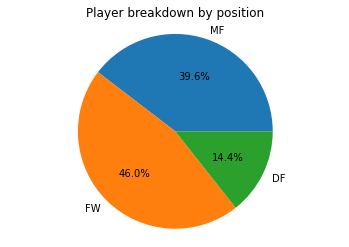

In [67]:
pos_data = [80, 93, 29]
plt.pie(pos_data, labels = ['MF', 'FW', 'DF'], autopct = '%1.1f%%')
plt.title('Player breakdown by position')
plt.axis('equal')
plt.show()

###### However, the large number of midfielders in the list is likely because there are more midfield positions in football than forward poitions. Therefore, the number of shots per position were investigated.

In [89]:
cln_df.groupby('Pos')['Sh'].sum()

Pos
DF       772
DFFW      40
DFMF      31
FW      2538
FWDF      28
FWMF    1781
MF      1718
MFDF     126
MFFW     855
Name: Sh, dtype: int64

###### Plotting the results as a pie chart, it is clear to see that the forwards attempt a greater proportion of the total shots:

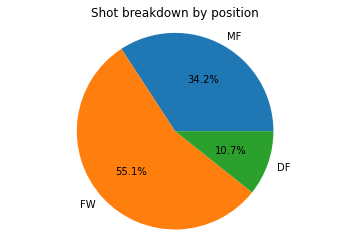

In [90]:
pos_sh = [2699, 4347, 843]
plt.pie(pos_sh, labels = ['MF', 'FW', 'DF'], autopct = '%1.1f%%')
plt.title('Shot breakdown by position')
plt.axis('equal')
plt.show()

###### The age breakdown can also reveal some insights

In [72]:
cln_df['Age'].value_counts()

24    26
29    22
25    20
23    19
30    16
22    15
28    14
21    14
27    12
26    12
31     8
19     8
20     8
34     3
32     2
36     2
33     1
Name: Age, dtype: int64

###### The age groups created are 19-23 (to reflect U-23 players who are eligible to participate in the PL2 academy league), 24-29 (for players who are approaching, in, or just exiting their prime years), and 30+ (for players who are in the latter years of their careers, close to retirement).
###### As expected, only a small number of players aged 30 and above feature and 24-29 is the most represented age group.

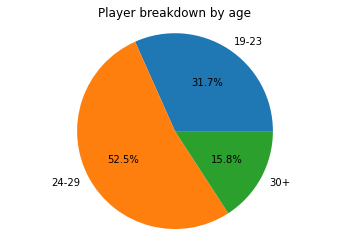

In [96]:
age_data = [64, 106, 32]
plt.pie(age_data, labels = ['19-23', '24-29', '30+'], autopct = '%1.1f%%')
plt.title('Player breakdown by age')
plt.axis('equal')
plt.show()

### Relationship analysis

###### Before attempting to find any relationships in the data, it is important to know whether any correlations exist at all. The standouts for investigation are the correlations between the average distance of shots from the goal line and the non-penalty xG per shot,  and the number of goals and the amount of xG and the number of shots.

In [91]:
cln_df.corr()

,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
Age,1.000000,-0.991054,0.052252,0.104879,0.078999,0.046031,-0.116303,0.031016,-0.021356,0.011160,0.077471,-0.135537,-0.005843,0.136039,0.153723,0.121007,0.097026,0.053761,-0.001218,-0.001414
Born,-0.991054,1.000000,-0.059801,-0.108915,-0.079832,-0.046705,0.116478,-0.023993,0.024864,-0.023766,-0.089654,0.136669,-0.005266,-0.133340,-0.152945,-0.120222,-0.096239,-0.053531,-0.009967,-0.010963
90s,0.052252,-0.059801,1.000000,0.385875,0.554268,0.450716,-0.061175,-0.260573,-0.214451,0.063014,0.087114,0.103563,0.230937,0.260153,0.244274,0.337994,0.320287,-0.220686,0.216769,0.190879
Gls,0.104879,-0.108915,0.385875,1.000000,0.829397,0.891233,0.390922,0.564051,0.633627,0.684416,0.487349,-0.237202,0.249520,0.558493,0.561830,0.907283,0.883010,0.466004,0.497035,0.461879
Sh,0.078999,-0.079832,0.554268,0.829397,1.000000,0.918680,0.172066,0.608153,0.540091,0.294766,0.198040,-0.074559,0.296088,0.525456,0.519249,0.875138,0.859010,0.212058,0.159174,0.121442
SoT,0.046031,-0.046705,0.450716,0.891233,0.918680,1.000000,0.501781,0.611800,0.717658,0.473538,0.192516,-0.141024,0.282158,0.440217,0.443880,0.879331,0.882961,0.351520,0.297023,0.269968
SoT%,-0.116303,0.116478,-0.061175,0.390922,0.172066,0.501781,1.000000,0.266830,0.677975,0.548162,-0.000161,-0.195843,0.067833,0.039263,0.061312,0.297271,0.321096,0.425789,0.312757,0.320790
Sh/90,0.031016,-0.023993,-0.260573,0.564051,0.608153,0.611800,0.266830,1.000000,0.868342,0.309490,0.175230,-0.210697,0.124658,0.311489,0.323579,0.648084,0.651948,0.460165,-0.000959,-0.014573
SoT/90,-0.021356,0.024864,-0.214451,0.633627,0.540091,0.717658,0.677975,0.868342,1.000000,0.517597,0.148007,-0.259546,0.114528,0.231926,0.256001,0.643250,0.663477,0.564083,0.173852,0.171459
G/Sh,0.011160,-0.023766,0.063014,0.684416,0.294766,0.473538,0.548162,0.309490,0.517597,1.000000,0.776127,-0.387409,0.029446,0.113390,0.135274,0.474473,0.503892,0.627458,0.642447,0.642376


###### From the scatterplot below, it is clear to see than the non-penalty xG per shot decreases as the shot distance increases. This makes logical sense as it is harder to score when you are further from the goal. This can be applied in game situations offensively by advising players to not be wasteful by shooting from further distances and from wide positions and defensively by advising defenders to force opposition attackers wide and to limit the space behind the defensive line (i.e. to play in a compact formation).

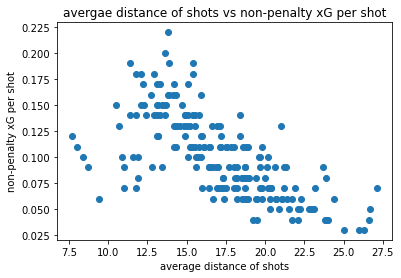

In [125]:
x = cln_df['Dist']
y = cln_df['npxG/Sh']
plt.scatter(x, y)
plt.title('avergae distance of shots vs non-penalty xG per shot')
plt.xlabel('average distance of shots')
plt.ylabel('non-penalty xG per shot')
plt.show()

###### The following two scatterplots highlight the relationship between shots and goals and xG and goals. An increase in both shots and xG correspond to an increase in goals. The very tight relationship with xG in particular is useful in confirming the statistic's validity. Relating to the game, it is clear that the top goal scorers in a given season will be those that take the most opportunities to score, however what is slighly more important is the quality of those chances (which is incorporated by xG). Therefore, teams should aim to be as efficient as possible, gearing all principles of play towards increasing the volume and quality of their own shots, whilst limiting the volume and quality of the opposition's.

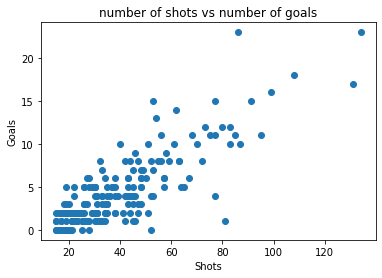

In [126]:
x = cln_df['Sh']
y = cln_df['Gls']
plt.scatter(x, y)
plt.title('number of shots vs number of goals')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.show()

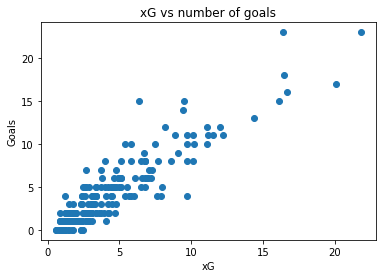

In [127]:
x = cln_df['xG']
y = cln_df['Gls']
plt.scatter(x, y)
plt.title('xG vs number of goals')
plt.xlabel('xG')
plt.ylabel('Goals')
plt.show()

###### Finally, the top scorers for the 21/22 season can be found were extracted from the dataset to explore the relationship between xG and goals, and other general features. Notable figures in this list are Son (the only player in the list with a greater than 50% shot accuracy), Ronaldo (the oldest player), De Bruyne (the only midfielder), Jota (the youngest player), and Vardy (who had a goals per 90 ratio better than every player, bar Salah).

In [111]:
top_scorers = cln_df[['Player', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT%', 'PK', 'xG']].nlargest(n = 10, columns = 'Gls')
top_scorers

,Player,Pos,Age,90s,Gls,Sh,SoT%,PK,xG
216,Son Heung-min,FWMF,29,33.4,23,86,54.7,0,16.4
429,Mohamed Salah,FW,29,30.7,23,134,36.6,5,21.8
418,Cristiano Ronaldo,FW,36,27.3,18,108,36.1,3,16.5
248,Harry Kane,FW,28,35.9,17,131,38.9,4,20.1
305,Sadio Mané,FW,29,31.3,16,99,37.4,0,16.7
112,Kevin De Bruyne,MF,30,24.5,15,77,40.3,0,6.4
241,Diogo Jota,FW,24,26.3,15,91,36.3,0,16.1
508,Jamie Vardy,FW,34,20.1,15,53,47.2,0,9.5
540,Wilfried Zaha,FW,28,30.7,14,62,41.9,5,9.4
471,Raheem Sterling,FW,26,23.6,13,54,46.3,2,14.4


###### With a total xG overperformance of 21.7 (an average of 2.17 per player, compared to -0.17 for the remaining players) for the top 10 scorers, it is indicated that, rather than achieving this solely by receiving a high quantity and/or quality of chances, it is largely due to their superior finishing ability that these players score more than their competitors. Therefore, teams must be proficient in acquiring and accommodating the most lethal finishers to achieve better results.

In [99]:
round(cln_df.nlargest(n = 10, columns = 'Gls')['G-xG'].sum(), 1)

21.7

In [129]:
round(cln_df.nsmallest(n = 192, columns = 'Gls')['G-xG'].sum(), 1)

-33.4

### Conclusions

###### The data used in this notebook covers a large number of players and is limited in scope so the insights taken are very general, simply confirming the observations most people would already agree on.
###### To gain more specific, actionable insights, single player data covering a larger number of metrics would be more useful because it allow the indviduals strengths and weaknesses to be highlighted, rather than the average for an entire league.
###### Additionally, to aid the selection of a player or group of players for analysis, the filtering carried out in this notebook could be applied to a dataset as a preliminary step to remove players with certain characterstics. For example, when searching for a prolific striker, the number of shots per 90 is an important metric to remove players as it is largely an intrinsic nature.